## <center>CITS5508 Lab sheet 2: Classification on...................</center>

**Name: Alastair Mory**<br>
**Student number: 21120848**<br>
**Date created:** March 13th 2019<br>
**Last modified:** March Xth 2019<br>

A brief description about the work done in this lab sheet...


## 1. Load dataset & simplify

Here we will read the training.csv & testing.csv, and remove all 'pred_minus_obs' data columns as per instruction 2.

In [56]:
import pandas as pd

training = pd.read_csv("training.csv")
testing = pd.read_csv("testing.csv")

# Drop "pred_minus_obs_..." columns:
columns_to_drop = [f"pred_minus_obs_H_b{i}" for i in range(1,10)]
columns_to_drop += [f"pred_minus_obs_S_b{i}" for i in range(1,10)]
training = training.drop(columns=columns_to_drop)
testing = testing.drop(columns=columns_to_drop)


## 2. Visualising the data

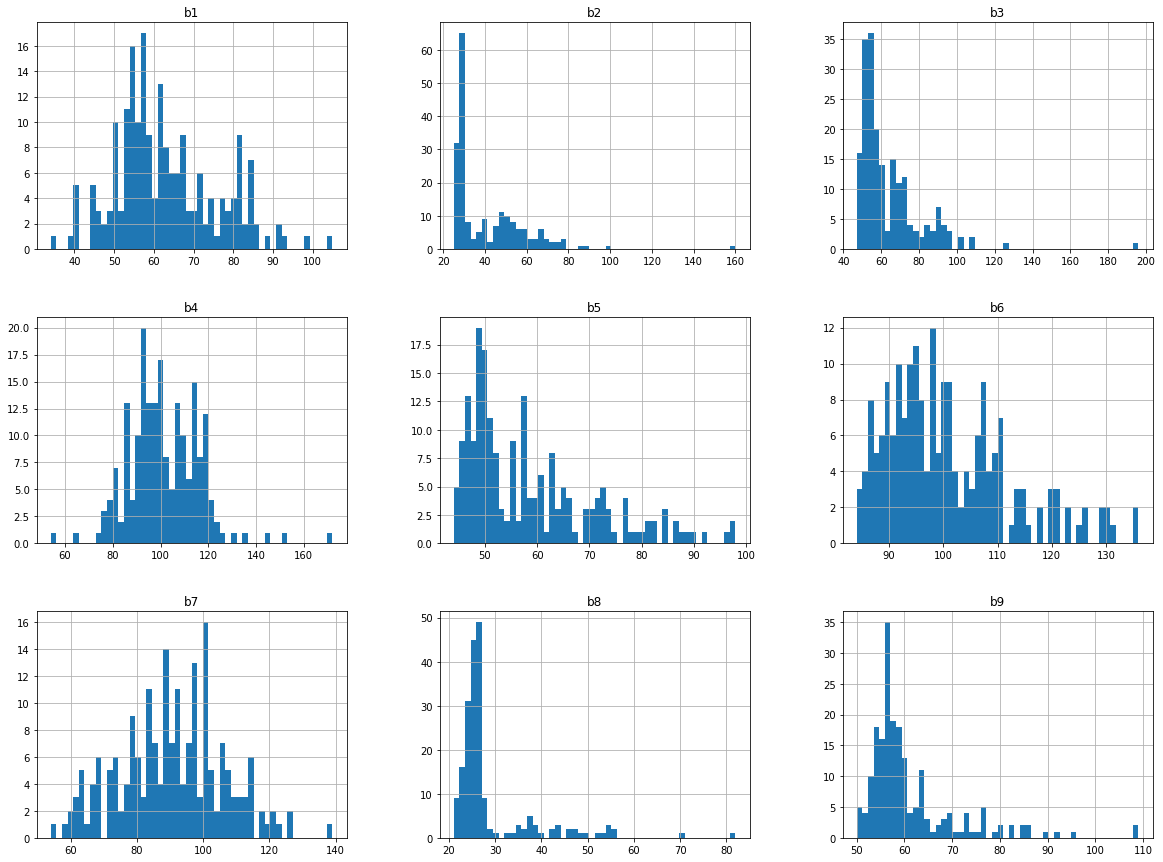

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
training.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
# Sample Data
training.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59


In [23]:
# Column Statistics
training.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000


Maybe you need a *markdown* cell here to explain the output of the previous `Code` cell. 

You can emphasize words in your sentences using boldface, e.g., **this is important**. You can even put in reasonably complex mathematics equations in a *Markdown* cell.

To run (or execute) a cell, click on the cell and press the *Enter* key while holding down the *Shift* key. You can merge cells, split cells, insert cells above or below the current cell.

In [26]:
# some more Python code here
# create a numpy array containing 0..9 (inclusive)
a = np.array(range(10))
print('a =', a)
print(a)
print(a.shape)
print('The last two print statements are not very meaningful as, looking just at the output,')
print('we don''t know what it means.')
print('The last element of a is a[-1]. Its value is', a[-1])
print('Reversing the array a is also easy. ', a[-1::-1])

a = [0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
(10,)
The last two print statements are not very meaningful as, looking just at the output,
we dont know what it means.
The last element of a is a[-1]. Its value is 9
Reversing the array a is also easy.  [9 8 7 6 5 4 3 2 1 0]


## 3. Checking label balance...

In [42]:
def count_labels(data, labels):
    """Counts number of instances of each label in data."""
    counts = []
    for label in labels:
        counts.append(sum([x == label for x in data]))
    return counts

def percents_from_counts(data):
    """Converts label counts to percentages."""
    total = sum(data)
    percents = []
    for x in data:
        percents.append(f"{(x/total*100):4.1f}%")
    return percents

class_labels = ["d", "h", "o", "s"]
training_counts = count_labels(training["class"], class_labels)
testing_counts = count_labels(testing["class"], class_labels)
print("Class totals:")
print(pd.DataFrame([training_counts, testing_counts],
             ["training", "testing"],
             class_labels))

train_percents = percents_from_counts(training_counts)
test_percents = percents_from_counts(testing_counts)
print("\nClass proportions:")
print(pd.DataFrame([train_percents, test_percents],
             ["training", "testing"],
             class_labels))

Class totals:
            d   h   o    s
training   54  48  37   59
testing   105  38  46  136

Class proportions:
              d      h      o      s
training  27.3%  24.2%  18.7%  29.8%
testing   32.3%  11.7%  14.2%  41.8%


The training set has more than double the proportion of class "h" as the test set, 

## 4. Data normalisation


In [60]:
from sklearn.preprocessing import StandardScaler
train_features = training.drop("class", axis=1)
test_features = testing.drop("class", axis=1)

scaler = StandardScaler().fit(train_features)

train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

/home/uniwa/students8/students/21120848/linux/Documents/ml/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/uniwa/students8/students/21120848/linux/Documents/ml/env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
/home/uniwa/students8/students/21120848/linux/Documents/ml/env/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## 5. Stochastic Gradient Descent

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor)

[True, False, False, False, True, False, False, True, False, False, True, False, False, True, False, False, False, True, False, False, False, True, False, False, True, False, False, True, True, True, True, False, False, False, True, True, True, False, False, True, True, True, False, False, False, True, True, False, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False

/home/uniwa/students8/students/21120848/linux/Documents/ml/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


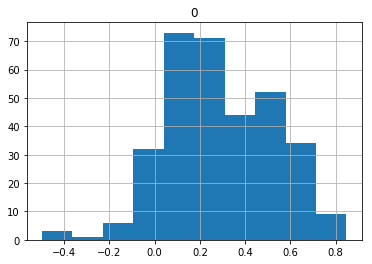

/home/uniwa/students8/students/21120848/linux/Documents/ml/env/lib/python3.6/site-packages/numpy/lib/histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

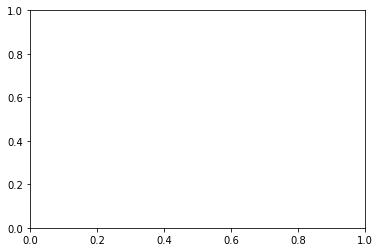

In [73]:
from sklearn.linear_model import SGDRegressor

y = [y == "d" for y in training["class"]]
print(y)
X = train_features

sgd_reg = SGDRegressor()

sgd_reg.fit(X, y)

xp = sgd_reg.predict(test_features)

sgd_reg.intercept_, sgd_reg.coef_

pd.DataFrame(xp).hist()
plt.show()


## 6. Logistic Regression

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [59]:
from sklearn.linear_model import LogisticRegression